In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# 导入依赖
import warnings

warnings.filterwarnings("ignore")

# Disable logging messages unless there is an error
set_log_level("ERROR")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


有两种方法可以向 NeuralProphet 添加特殊事件：自定义事件和预定义的国家/地区假期。两者都可用于对其他组件未捕获的特殊场合和事件进行建模。这些特殊事件有助于提高模型的性能和可解释性

首先我们研究国家假期，然后我们将探索定制活动

In [3]:
# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("/home/ann/opt/iNeuralProphet/data/tutorial01.csv")
df.head()

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91


先使用默认模型进行训练

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

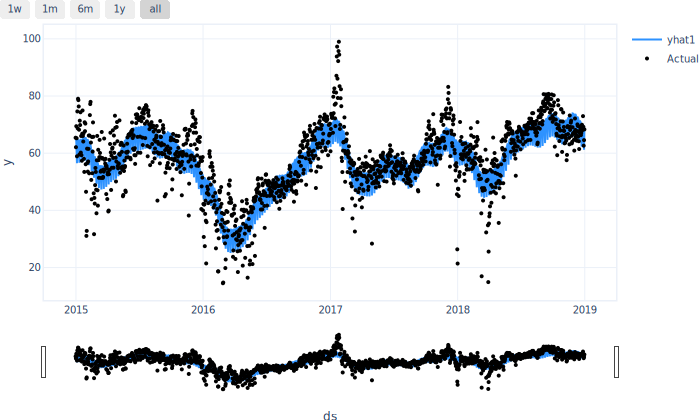

In [4]:
# Default model
m = NeuralProphet()
m.set_plotting_backend("plotly-static")

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

NeuralProphet 支持广泛的国家和地区。完整列表可以在 pyholidays 文档中找到，该文档在内部用于国家假期支持。

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

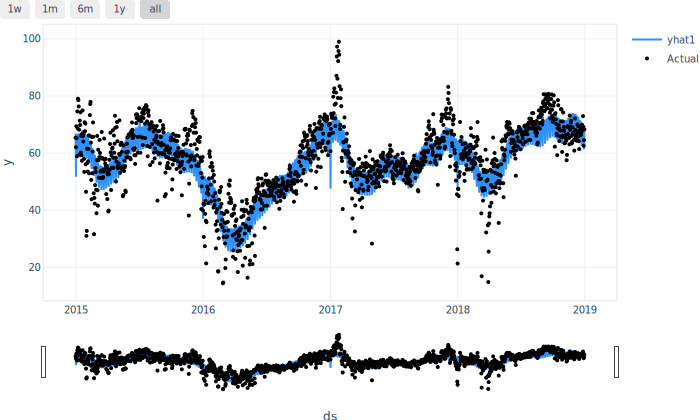

In [5]:
m = NeuralProphet()
m.set_plotting_backend("plotly-static")

m = m.add_country_holidays("US")

metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

自定义事件与国家/地区假期非常相似，但可用于对任何特殊事件进行建模。唯一的区别是事件名称和日期场合需要由用户指定。此外，用户必须将事件包含在训练数据中或相应地准备数据集

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

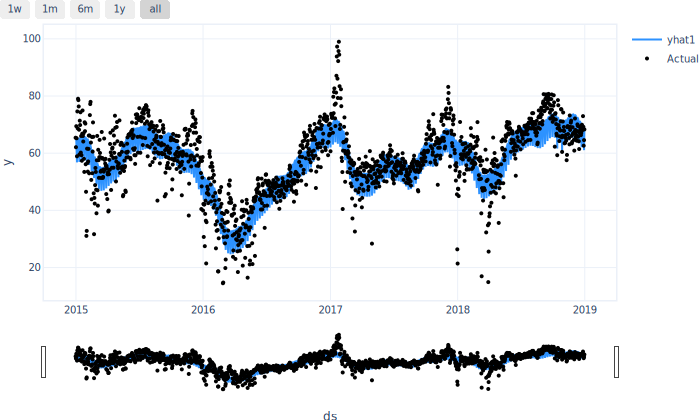

In [6]:
df_events = pd.DataFrame(
    {
        "event": "extreme_weather",
        "ds": pd.to_datetime(
            [
                "2018-11-23",
                "2018-11-17",
                "2018-10-28",
                "2018-10-18",
                "2018-10-14",
            ]
        ),
    }
)

m = NeuralProphet()
m.set_plotting_backend("plotly-static")

m.add_events("extreme_weather")

df_all = m.create_df_with_events(df, df_events)

metrics = m.fit(df_all)
forecast = m.predict(df_all)
m.plot(forecast)

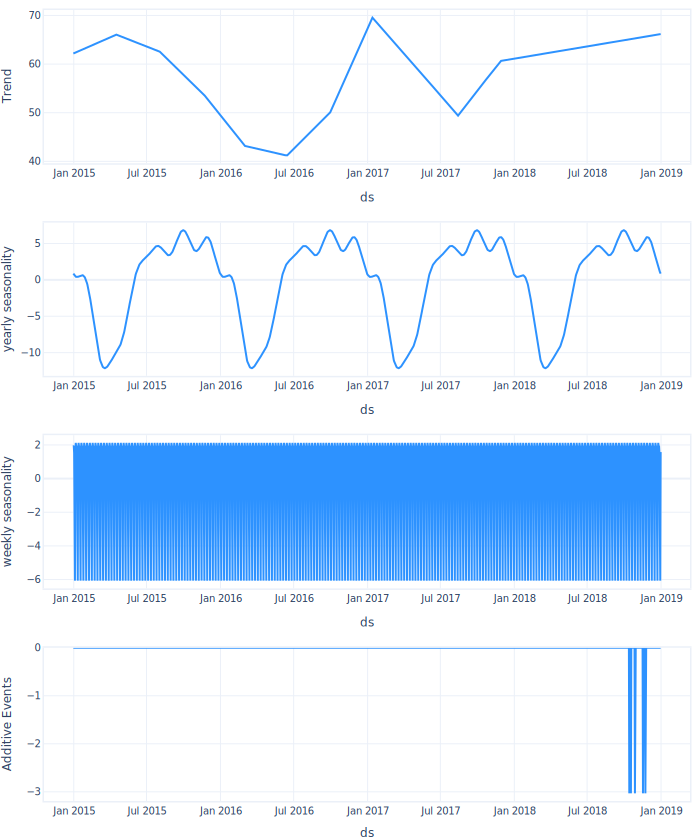

In [7]:
m.plot_components(forecast)

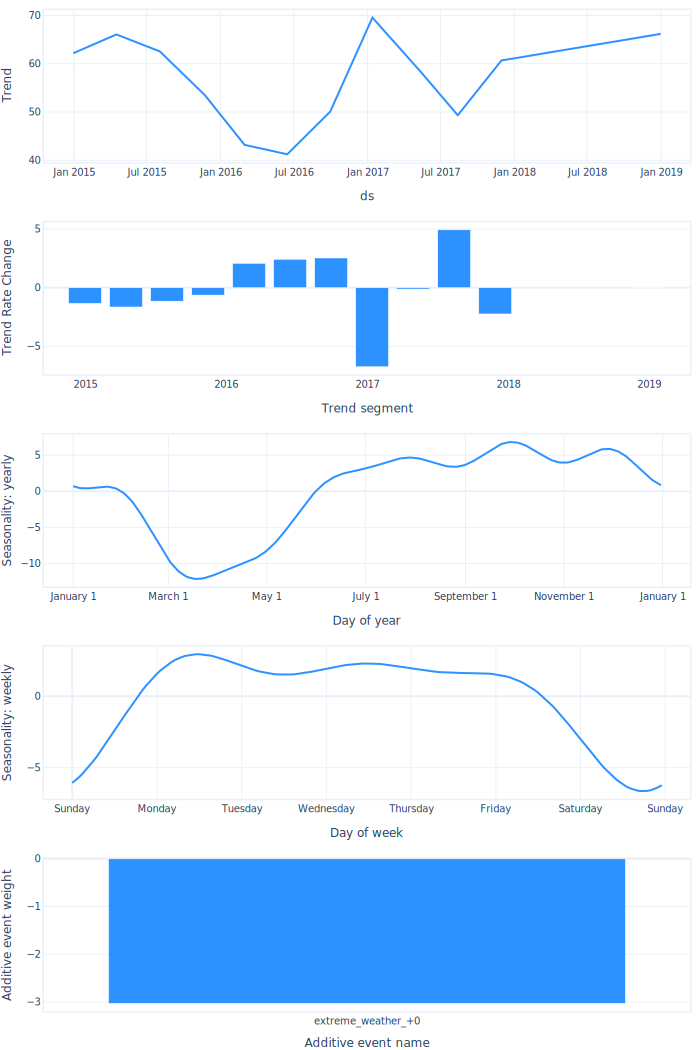

In [8]:
m.plot_parameters()